In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

clean_data=[]

with open('SensorRinconada1607200950.json', 'r') as f:
    distros_dict = json.load(f)

for message in distros_dict:
    aux_dic={   'id':message['id'],
                'time':message['DT']['$date'],
                'BT_V':message['BT']['V'],
                'BT_I':message['BT']['I'],
                'LD_V':message['LD']['V'],
                'LD_I':message['LD']['I'],
                'SN_L1':message['SN']['L1'],
                'EV_SS':message['EV']['SS']                        
                }
   
    if 'T0' in message['SN']:
        aux_dic['SN_T0']=message['SN']['T0']
    if 'T1' in message['SN']:
        aux_dic['SN_T1']=message['SN']['T1']
    if 'T2' in message['SN']:
        aux_dic['SN_T2']=message['SN']['T2']
    if 'T3' in message['SN']:
        aux_dic['SN_T3']=message['SN']['T3']
    if 'T4' in message['SN']:
        aux_dic['SN_T4']=message['SN']['T4']
    if 'T5' in message['SN']:
        aux_dic['SN_T5']=message['SN']['T5']
    if 'T6' in message['SN']:
        aux_dic['SN_T6']=message['SN']['T6']
    if 'T7' in message['SN']:
        aux_dic['SN_T7']=message['SN']['T7']
    if 'T8' in message['SN']:
        aux_dic['SN_T8']=message['SN']['T8']
    if 'T9' in message['SN']:
        aux_dic['SN_T9']=message['SN']['T9']
                       
    clean_data.append(aux_dic)
    
df = pd.DataFrame(clean_data)
print (df)

         BT_I   BT_V  EV_SS    LD_I  LD_V  SN_L1  SN_T0  SN_T1  SN_T2  SN_T3  \
0        0.00   0.00     18   88.75  4.97     27   21.9   21.8   22.0   21.8   
1        0.00   0.00     22  143.75  4.97     27   21.9   21.9   22.0   21.8   
2        0.00   0.00     22   56.25  4.97     27   21.9   21.9   22.1   21.8   
3        0.00   0.00     23   56.25  4.98     30   21.9   22.1   22.1   21.9   
4        0.00   0.00     20   55.00  4.98     30   21.9   22.1   22.1   21.9   
5        0.00   0.00     22   55.00  4.98     26   22.0   22.1   22.0   21.9   
6        0.00   0.00     22   53.75  4.98     26   22.0   22.1   22.0   21.9   
7        0.00   0.00     25   67.50  4.98     26   21.9   21.9   22.0   21.9   
8        0.00   0.00     22   52.50  4.98     26   21.9   21.9   21.9   21.9   
9        0.00   0.00     23   57.50  4.98     26   21.9   21.8   21.9   21.8   
10       0.00   0.00     23   63.75  4.98     26   21.8   21.8   21.9   21.8   
11       0.00   0.00     23   53.75  4.9

In [3]:
df["time"]= df["time"].str.replace("/", "-", case = False)
df["time"]= df["time"].str.replace("T", " ", case = False)
df["time"]= df["time"].str.replace("Z", " ", case = False)
df.time=pd.to_datetime(df.time)

In [4]:
# Elimina todos los valores en la columna SN_1 mayores a 700, cuando estos son mayores a 700 este registro no se puede
# tener en cuenta. tomado de: https://www.youtube.com/watch?v=eq-zOhBkTMk
df=df[df.SN_L1 < 700]
print (df)

         BT_I   BT_V  EV_SS    LD_I  LD_V  SN_L1  SN_T0  SN_T1  SN_T2  SN_T3  \
0        0.00   0.00     18   88.75  4.97     27   21.9   21.8   22.0   21.8   
1        0.00   0.00     22  143.75  4.97     27   21.9   21.9   22.0   21.8   
2        0.00   0.00     22   56.25  4.97     27   21.9   21.9   22.1   21.8   
3        0.00   0.00     23   56.25  4.98     30   21.9   22.1   22.1   21.9   
4        0.00   0.00     20   55.00  4.98     30   21.9   22.1   22.1   21.9   
5        0.00   0.00     22   55.00  4.98     26   22.0   22.1   22.0   21.9   
6        0.00   0.00     22   53.75  4.98     26   22.0   22.1   22.0   21.9   
7        0.00   0.00     25   67.50  4.98     26   21.9   21.9   22.0   21.9   
8        0.00   0.00     22   52.50  4.98     26   21.9   21.9   21.9   21.9   
9        0.00   0.00     23   57.50  4.98     26   21.9   21.8   21.9   21.8   
10       0.00   0.00     23   63.75  4.98     26   21.8   21.8   21.9   21.8   
11       0.00   0.00     23   53.75  4.9

In [6]:
T0 = df["SN_T0"]
T1 = df["SN_T1"]
T2 = df["SN_T2"]
T3 = df["SN_T3"]
T4 = df["SN_T4"]
T5 = df["SN_T5"]
T6 = df["SN_T6"]
T7 = df["SN_T7"]
T8 = df["SN_T8"]
T9 = df["SN_T9"]
fecha=df["time"]

In [7]:
type(fecha)

pandas.core.series.Series

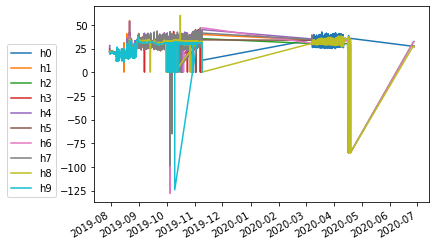

In [11]:
import datetime
p=["h0","h1","h2","h3","h4","h5","h6","h7","h8","h9"]
fig, ax = plt.subplots()
ax.plot(fecha, T0)
ax.plot(fecha, T1)
ax.plot(fecha, T2)
ax.plot(fecha, T3)
ax.plot(fecha, T4)
ax.plot(fecha, T5)
ax.plot(fecha, T6)
ax.plot(fecha, T7)
ax.plot(fecha, T8)
ax.plot(fecha, T9)
ax.legend(p,bbox_to_anchor=(-0.1,0), loc="lower right")
fig.autofmt_xdate()
#ax.set_xlim([datetime.date(2019, 8, 1), datetime.date(2019, 8, 29)])
# prmite ver la grafica en el rango de fechas especificadas
#ax.set_ylim([10, 40])
ax.fmt_xdata = mdates.DateFormatter('%Y%-m%-d')
plt.show()

In [78]:
# En la grafica se ve que hay 3 periodos el primero entre septiembre y noviembre de 2019
# El segundo periodo entre marzo y mayo de 2020
# El tercer periodo entre junio y julio de 2020